In [1]:
from wrappers.file_setup import CURRENT_EXPERIMENT
from wrappers.configreader import Config
from wrappers.file_setup import close_station, my_init
import qcodes as qc
from wrappers import *
from wrappers.transmon import *
%matplotlib nbagg

/Users/natalie/Documents/PhD/Qdev/Qcodes/qcodes/instrument/parameter.py:1315: UserWarning: Parameter single: `ManualParameter` is deprecated, use `Parameter` instead with `set_cmd=None`.
  '`Parameter` instead with `set_cmd=None`.'.format(self))


In [2]:
station = qc.Station()
my_init('floquet_test3', station, qubit_count=4, calib_config=True)

Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/natalie/Documents/PhD/Qdev/QcodesRelated/QcodesExperiments/Qcodes_test_data/floquet_test3/commands.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


In [3]:
set_current_qubit(1)
set_calibration_val('pi_pulse_sigma', 30e-9)

In [4]:
get_calibration_array('pi_pulse_sigma')

[3e-08, 3e-08, 3e-08, 3e-08]

In [5]:
c_ssb = pb.make_spectroscopy_SSB_sequence(0, 200e6, 1e6, channels=[3, 1, 2, 4],
                                          readout_SSBfreqs=[10e6, 1e6], pulse_mod=True)

sequence check passed: 201 elements


ch  1 :  wait                   |SSB_drive_Q         |wait                  
ch  2 :  wait_before_measurement|cavity_measurement_i|wait_after_measurement
ch  3 :  wait                   |SSB_drive_I         |wait                  
ch  4 :  wait_before_measurement|cavity_measurement_q|wait_after_measurement


<IPython.core.display.Javascript object>


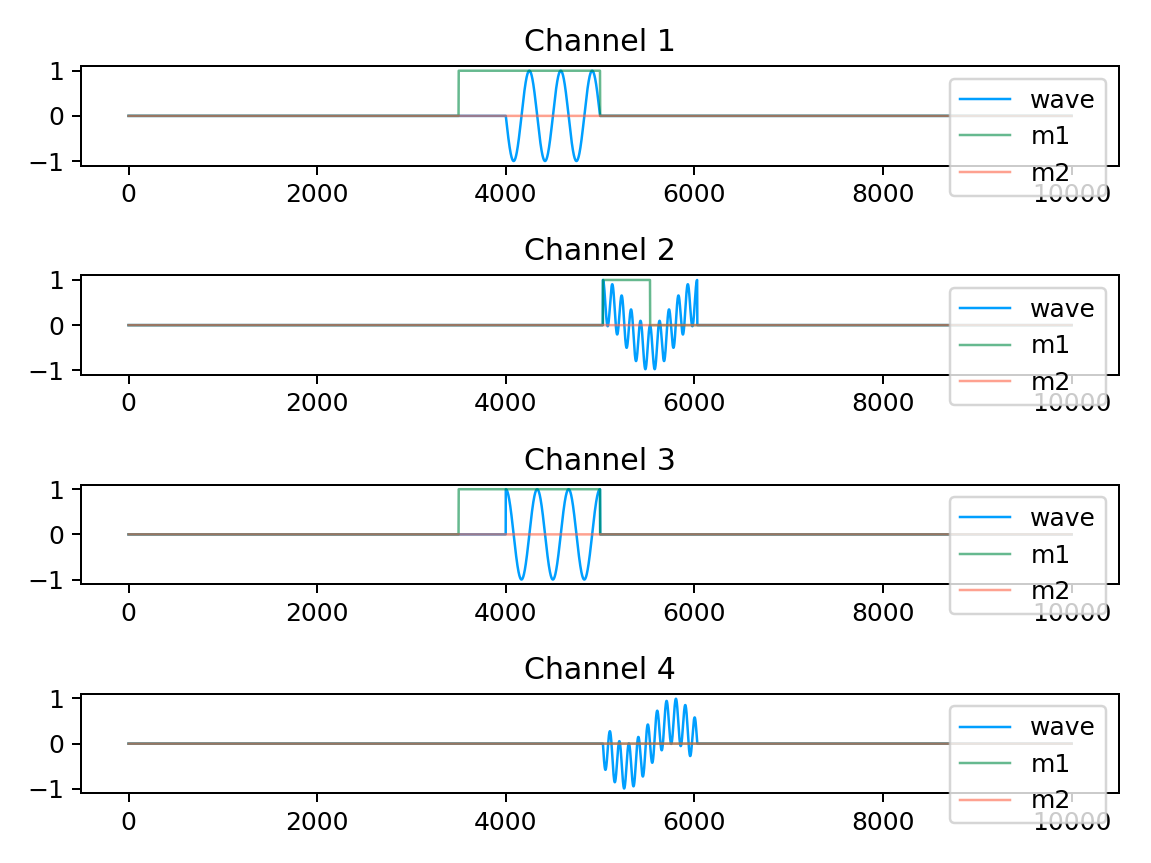

In [6]:
c_ssb.print_segment_lists()
pl = c_ssb.plot(elemnum=3)

In [7]:
rabi = pb.make_rabi_sequence(0, 100e-9, 5e-9, pulse_mod=True, gaussian=True,
                            SSBfreq=20e6)

sequence check passed: 21 elements


ch  1 :  compensating_wait      |gaussian_SSB_pi_I_pulse|wait                  
ch  2 :  compensating_wait      |gaussian_SSB_pi_Q_pulse|wait                  
ch  4 :  wait_before_measurement|cavity_measurement     |wait_after_measurement


<IPython.core.display.Javascript object>


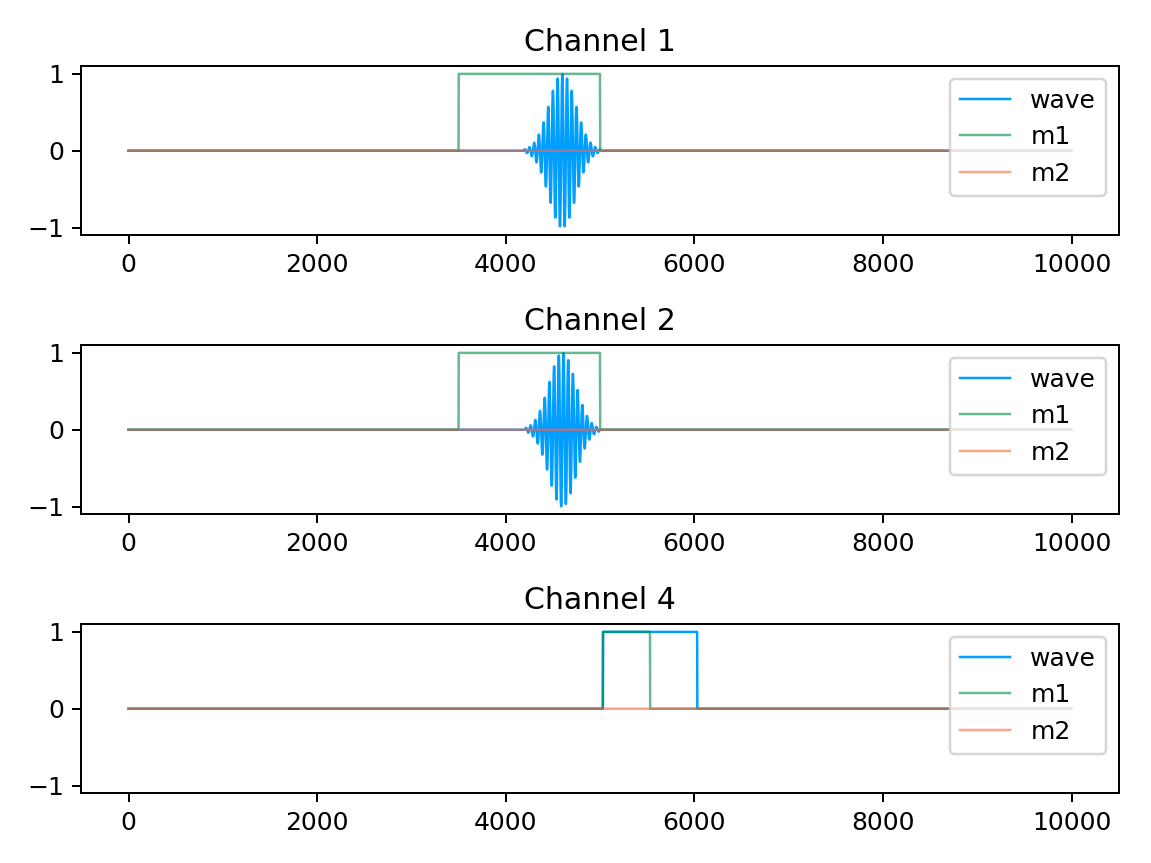

In [8]:
rabi.print_segment_lists()
pl = rabi.plot(elemnum=20)

In [28]:
t1 = pb.make_t1_sequence(0, 1e-6, 10e-9, pi_dur=100e-9, gaussian=False,
                         pulse_mod=True, SSBfreq=None)

sequence check passed: 101 elements


ch 1: [compensating_wait, square_pi_pulse, pulse_readout_delay, wait]
ch 4: [wait_before_measurement, cavity_measurement, wait_after_measurement]


<IPython.core.display.Javascript object>


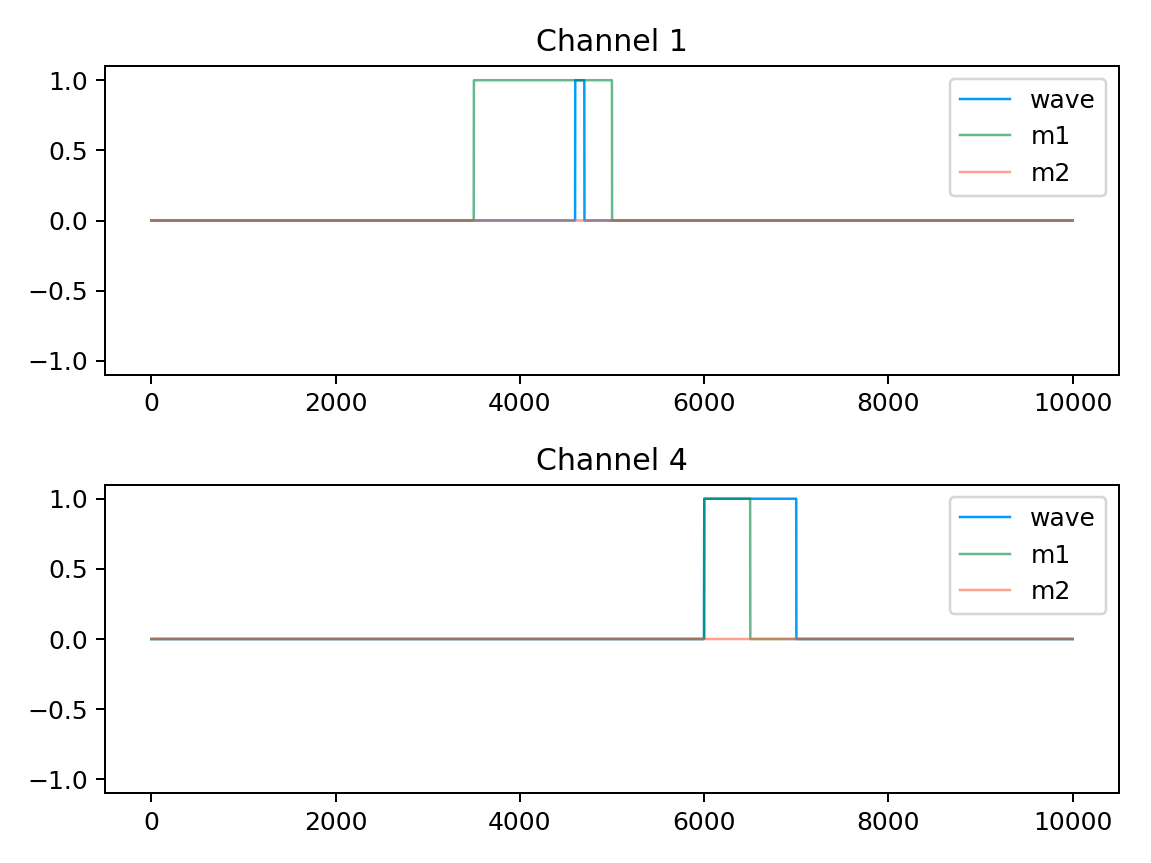

In [32]:
t1.print_segment_lists()
pl = t1.plot(elemnum=30)

In [31]:
set_calibration_val('pulse_readout_delay', 1e-7)

In [33]:
ramsey = pb.make_ramsey_sequence(0, 1e-6, 100e-9, SSBfreq=10e6, pulse_mod=False)

sequence check passed: 11 elements


ch 1: [compensating_wait, gaussian_SSB_pi_half_I_pulse, pulse_readout_delay, gaussian_SSB_pi_half_I_pulse, wait]
ch 2: [compensating_wait, gaussian_SSB_pi_half_Q_pulse, pulse_readout_delay, gaussian_SSB_pi_half_Q_pulse, wait]
ch 4: [wait_before_measurement, cavity_measurement, wait_after_measurement]


<IPython.core.display.Javascript object>


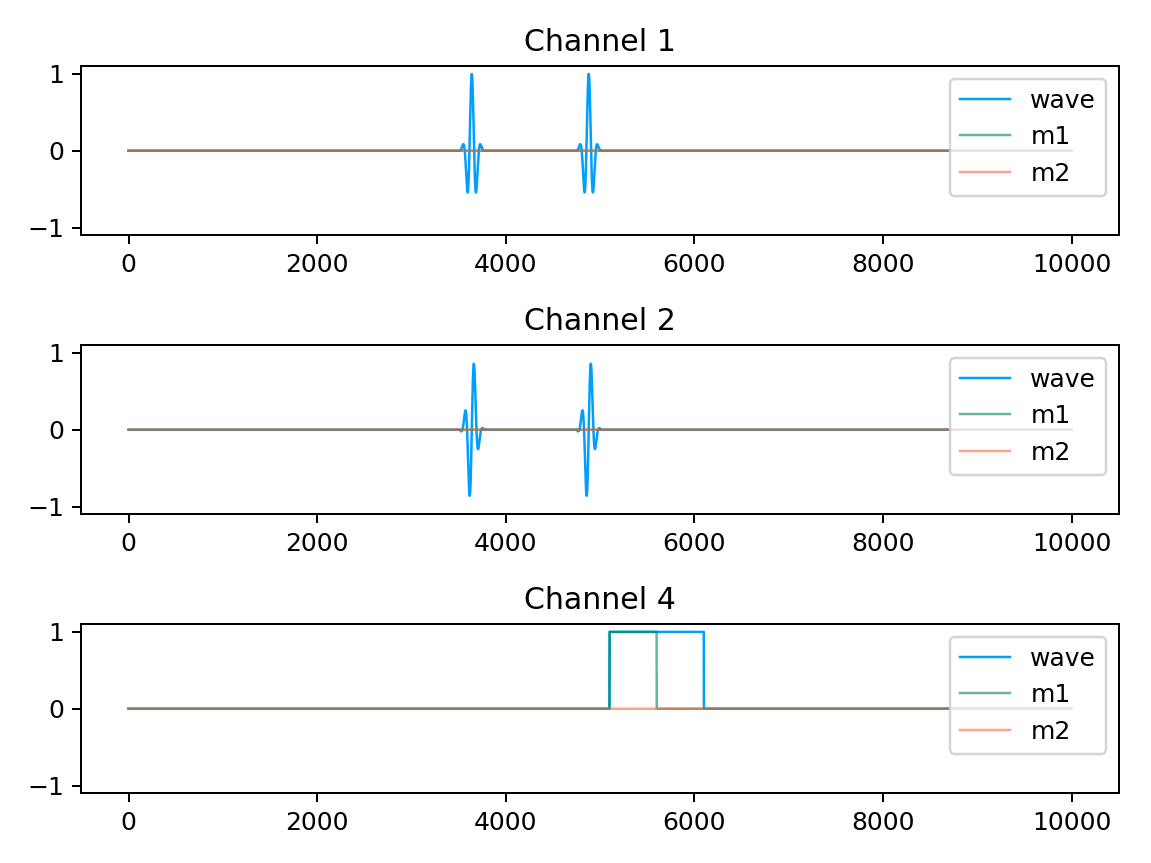

In [36]:
ramsey.print_segment_lists()
pl = ramsey.plot(elemnum=10)